In [1]:
import numpy as np
import pandas as pd
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.datasets import imdb, reuters
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

/home/chyld/.local/apps/miniconda3/envs/gamma/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
max_words = 20_000
line_length = 200
batch_size = 32

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words)

In [4]:
# number of articles
x_train.shape, y_train.shape

((8982,), (8982,))

In [5]:
# reuters categories
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [6]:
# mapping dictionaries
word_to_id = reuters.get_word_index()
id_to_word = {v:k for k,v in word_to_id.items()}

In [7]:
id_to_word[0] = '<START>'

In [8]:
def article(index):
    return ' '.join([id_to_word[max(0, idx-3)] for idx in x_train[index]])

In [9]:
for i in range(10):
    print(article(i), '\n\n\n')

<START> <START> <START> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3 



<START> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <START> turnover in 1986 was 17 5 billion belgian francs reuter 3 



<START> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect 

In [10]:
# make all rows the same length
x_train = sequence.pad_sequences(x_train, maxlen=line_length)
x_test = sequence.pad_sequences(x_test, maxlen=line_length)

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
x_train.shape, y_train.shape

((8982, 200), (8982, 46))

In [13]:
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(46, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 2,697,518
Trainable params: 2,697,518
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 52s 6ms/step - loss: 2.3526 - acc: 0.3917 - val_loss: 2.0050 - val_acc: 0.4933
Epoch 2/10
8982/8982 [==============================] - 59s 7ms/step - loss: 1.8315 - acc: 0.5229 - val_loss: 1.7366 - val_acc: 0.5641
Epoch 3/10
8982/8982 [==============================] - 54s 6ms/step - loss: 1.6718 - acc: 0.5651 - val_loss: 1.6418 - val_acc: 0.5784
Epoch 4/10
8982/8982 [==============================] - 54s 6ms/step - loss: 1.5494 - acc: 0.5967 - val_loss: 1.6219 - val_acc: 0.5935
Epoch 5/10
8982/8982 [==============================] - 54s 6ms/step - loss: 1.4573 - acc: 0.6182 - val_loss: 1.6041 - val_acc: 0.6042
Epoch 6/10
8982/8982 [==============================] - 54s 6ms/step - loss: 1.3432 - acc: 0.6490 - val_loss: 1.5533 - val_acc: 0.6211
Epoch 7/10
8982/8982 [==============================] - 53s 6ms/step - loss: 1.1965 - acc: 0.6893 - val_loss: 1.4663 - val_acc: 0.6385
Epoch 8

In [15]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
loss, acc

2246/2246 [==============================] - 3s 1ms/step


(1.448539528481576, 0.6558325912733749)

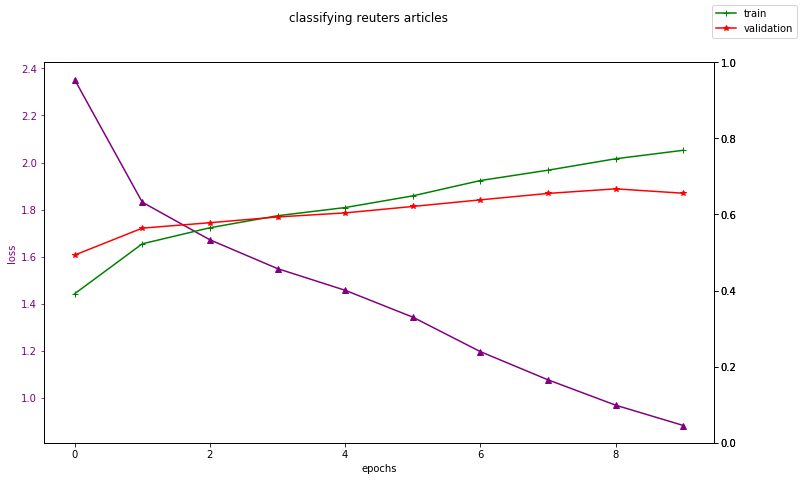

In [16]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['acc'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_acc'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.suptitle('classifying reuters articles');
fig.legend();